In [1]:
import torch
from pipeline_stable_diffusion_3 import StableDiffusion3Pipeline
# from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large", torch_dtype=torch.bfloat16)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.32.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-3.5-large",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [17]:
%%time
image = pipe(
    "A cute steampunk quokka holding a sign that says 'Jerry uses Stable Diffusion 3.5', cinematic lighting",
    num_inference_steps=28,
    guidance_scale=3.5,
    height=512,
    width=512,
    generator = torch.Generator("cuda").manual_seed(0),
    compile=True,
    cache=False,
)

  0%|          | 0/28 [00:00<?, ?it/s]

CPU times: user 4.27 s, sys: 2.3 s, total: 6.57 s
Wall time: 6.41 s


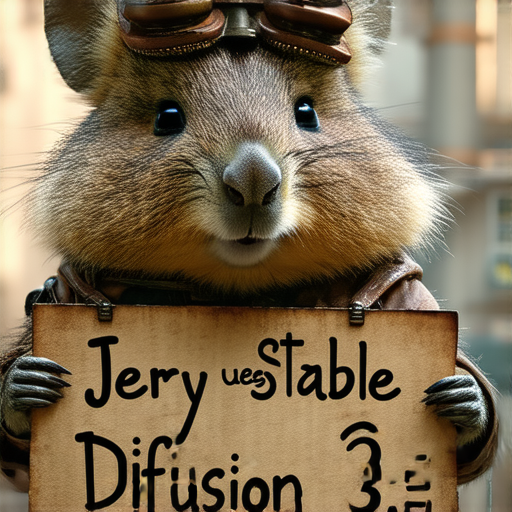

In [16]:
image[0].images[0]

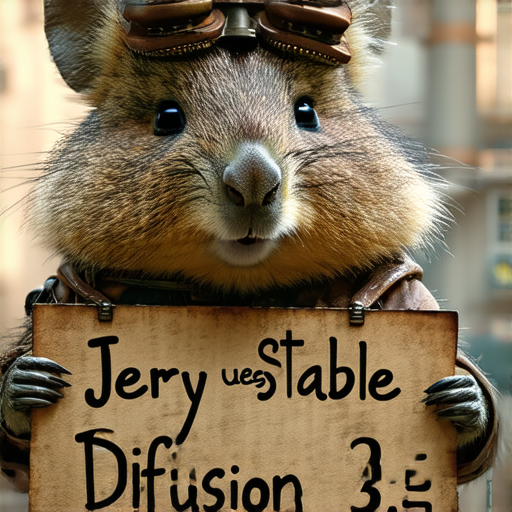

In [18]:
image[0].images[0]

In [3]:
from matplotlib import pyplot as plt

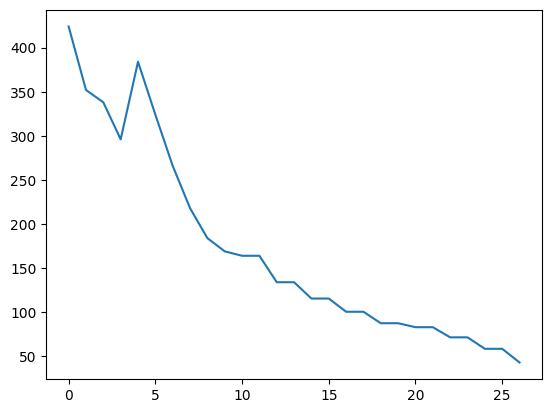

In [4]:
plt.plot([i.cpu().to(dtype=torch.float16) for i in norms])

### SD 3.5L with `guidance_scale`
| Measured on | Resolution, Steps | Time (sec)<sup>#</sup> |
|----------|----------|----------|
| Default Pipeline | 1024px, 28 | 29.7 |
| With `torch.compile` | 1024px, 28 | 24.6<sup>*</sup>|
| With `torch.compile` and model pred caching | 1024px, 28 | 19.4<sup>*</sup> |
| Default Pipeline | 512px, 28 | 8.18 |
| With `torch.compile` | 512px, 28 | 6.41<sup>*</sup> |
| With `torch.compile` and model pred caching | 512px, 28 | 5.05<sup>*</sup> |

<sup>*</sup> Compiliation time not included. <br>
<sup>#</sup> Wall time as measured with %%time magic. Not the tqdm measurement.

In [2]:
!nvidia-smi

Wed Oct 23 15:37:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:D2:00.0 Off |                    0 |
|  0%   34C    P0             74W /  300W |   27119MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
sum(p.numel() for p in pipe.transformer.parameters())

8056627520